<a href="https://colab.research.google.com/github/Gdyczko/Netflix_Movies_and_TV_Shows/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#![Logo Netflixa](https://cdn-1.webcatalog.io/catalog/netflix/netflix-icon-filled-256.png?v=1675597664407) NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## 🛬 Import the necessary libraries

In [1]:
# Import the necessary libraries
from google.colab import userdata
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📂 Download and loading dataset

In [2]:
# Conect Google Colabolatory with Kaggle dataset
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

# Download dataset
!kaggle datasets download -d shivamb/netflix-shows

# Unpacking the zip file
!unzip "netflix-shows.zip"

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 49.1MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [3]:
# Loading the dataset
netflix = pd.read_csv("netflix_titles.csv")

In [4]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 🧹 Data Cleaning

In [5]:
# Show the dataset info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Check duplicated
netflix.duplicated().value_counts()

False    8807
dtype: int64

In [7]:
# Chceck Nan values
missing_values = netflix[netflix.isna().any(axis=1)]

print(f"Number of rows {len(netflix)}")
print(f"Number of rows with NaN value {len(missing_values)}\n")

# Display the number of NaN for each column
for column in netflix.keys():
  nan_count = netflix[column].isna().sum()
  print(f"{column} quantity NaN: {nan_count}")

print(f"\nNumber of rows without NaN values: {len(netflix) - len(missing_values)}")

Number of rows 8807
Number of rows with NaN value 3475

show_id quantity NaN: 0
type quantity NaN: 0
title quantity NaN: 0
director quantity NaN: 2634
cast quantity NaN: 825
country quantity NaN: 831
date_added quantity NaN: 10
release_year quantity NaN: 0
rating quantity NaN: 4
duration quantity NaN: 3
listed_in quantity NaN: 0
description quantity NaN: 0

Number of rows without NaN values: 5332


In [8]:
# Dropping NaN values
netflix.dropna(inplace = True)

In [9]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 670.6+ KB


In [11]:
# Reset index
netflix = netflix.reset_index(drop = True)

In [12]:
# Change the dated display
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [13]:
# Display dataset info again for check
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 500.0+ KB


## 🔍 Analysis

In [14]:
# The number of films of a particular type
types = netflix[['type']].value_counts().reset_index(name = "count")
types

,type,count
0,Movie,5185
1,TV Show,147


In [15]:
# The number of films directed by a particular directors
directors = netflix[['director']].value_counts().reset_index(name= "count")
directors

,director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,15
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
...,...,...
3940,Jordi Llompart,1
3941,Jorge Blanco,1
3942,Jorge Hernandez Aldana,1
3943,Jorge M. Fontana,1


In [16]:
# The number and type of films directed by a particular directors
director = netflix.groupby('director')[['director', 'type']].value_counts().reset_index(name = "count")
director

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,1
4,Aadish Keluskar,Movie,1
...,...,...,...
3964,Çagan Irmak,Movie,1
3965,Ísold Uggadóttir,Movie,1
3966,Óskar Thór Axelsson,Movie,1
3967,Ömer Faruk Sorak,Movie,2


In [48]:
# Top 10 directors who directed the most films particular types
top_10_directors = netflix.groupby('director')[['director', 'type']].value_counts().sort_values(ascending = False).iloc[0:10].reset_index(name = "count")
top_10_directors

,director,type,count
0,"Raúl Campos, Jan Suter",Movie,18
1,Jay Karas,Movie,14
2,Marcus Raboy,Movie,14
3,Cathy Garcia-Molina,Movie,13
4,Youssef Chahine,Movie,12
5,Jay Chapman,Movie,12
6,Martin Scorsese,Movie,12
7,Steven Spielberg,Movie,11
8,Don Michael Paul,Movie,10
9,David Dhawan,Movie,9


In [18]:
# The number and type of films produced of particular countrie
countries = netflix.groupby('country')[['country', 'type']].value_counts().reset_index(name = "count")
countries

,country,type,count
0,", France, Algeria",Movie,1
1,Argentina,Movie,34
2,Argentina,TV Show,1
3,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
4,"Argentina, Chile",Movie,2
...,...,...,...
632,"Uruguay, Guatemala",Movie,1
633,"Uruguay, Spain, Mexico",Movie,1
634,Venezuela,Movie,1
635,Vietnam,Movie,7


In [19]:
# Top 10 countries the number and type of films produced of particular countrie
top_10_countries = netflix.groupby('country')[['country', 'type']].value_counts().sort_values(ascending = False).iloc[0:10].reset_index(name = "count")
top_10_countries

,country,type,count
0,United States,Movie,1819
1,India,Movie,868
2,United Kingdom,Movie,164
3,Canada,Movie,104
4,Egypt,Movie,90
5,Nigeria,Movie,84
6,Spain,Movie,84
7,Indonesia,Movie,76
8,Turkey,Movie,74
9,Philippines,Movie,73


In [20]:
# Top 10 countries produced the most tv shows
top_10_tv_show_contries = countries[countries['type']=="TV Show"].sort_values(by = "count", ascending = False).iloc[0:10]
top_10_tv_show_contries

,country,type,count
521,United States,TV Show,27
439,United Kingdom,TV Show,19
372,South Korea,TV Show,10
267,Japan,TV Show,10
205,India,TV Show,7
380,Spain,TV Show,7
416,Taiwan,TV Show,7
128,France,TV Show,5
421,Thailand,TV Show,5
426,Turkey,TV Show,5


In [21]:
# Top 10 countries produced the most movies
top_10_movies_countries = countries[countries['type']=="Movie"].sort_values(by = "count", ascending = False).iloc[0:10]
top_10_movies_countries

,country,type,count
520,United States,Movie,1819
204,India,Movie,868
438,United Kingdom,Movie,164
47,Canada,Movie,104
120,Egypt,Movie,90
379,Spain,Movie,84
308,Nigeria,Movie,84
226,Indonesia,Movie,76
425,Turkey,Movie,74
266,Japan,Movie,73


In [22]:
# The number of films and their genres released in a given year
releasle_year = netflix.groupby('release_year')[['release_year', 'type']].value_counts().reset_index(name = "count")
releasle_year

,release_year,type,count
0,1942,Movie,1
1,1944,Movie,1
2,1945,Movie,1
3,1946,Movie,1
4,1947,Movie,1
...,...,...,...
82,2019,TV Show,24
83,2020,Movie,409
84,2020,TV Show,33
85,2021,Movie,146


In [23]:
# Top 10 the number of movies released in a given year
top_10_movies_years = releasle_year[releasle_year['type'] == "Movie"].sort_values(by = 'count', ascending = False).iloc[0:10]
top_10_movies_years

,release_year,type,count
77,2017,Movie,640
79,2018,Movie,632
75,2016,Movie,567
81,2019,Movie,495
83,2020,Movie,409
73,2015,Movie,340
71,2014,Movie,234
69,2013,Movie,195
67,2012,Movie,159
85,2021,Movie,146


In [24]:
# Top 10 the number of tv shows released in a given year
top_10_tv_shows_years = releasle_year[releasle_year['type'] == "TV Show"].sort_values(by = 'count', ascending = False).iloc[0:10]
top_10_tv_shows_years

,release_year,type,count
84,2020,TV Show,33
82,2019,TV Show,24
78,2017,TV Show,17
80,2018,TV Show,16
86,2021,TV Show,15
76,2016,TV Show,10
74,2015,TV Show,9
72,2014,TV Show,8
68,2012,TV Show,4
59,2006,TV Show,3


In [25]:
# Table with ratings for film
ratings = netflix.groupby('rating')[['rating', 'type']].value_counts().reset_index(name = "count")
ratings

,rating,type,count
0,G,Movie,40
1,NC-17,Movie,2
2,NR,Movie,58
3,PG,Movie,275
4,PG-13,Movie,470
5,R,Movie,778
6,TV-14,Movie,1177
7,TV-14,TV Show,37
8,TV-G,Movie,81
9,TV-G,TV Show,3


In [26]:
# Top 10 the most popular ratings for movie and their count
top_10_movies_rating = ratings[ratings['type'] == "Movie"].sort_values(by = "count", ascending = False).iloc[0:10]
top_10_movies_rating

,rating,type,count
10,TV-MA,Movie,1741
6,TV-14,Movie,1177
5,R,Movie,778
4,PG-13,Movie,470
12,TV-PG,Movie,416
3,PG,Movie,275
8,TV-G,Movie,81
14,TV-Y,Movie,71
16,TV-Y7,Movie,70
2,NR,Movie,58


In [27]:
# Top 10 the most popular ratings for TV Show and their count
top_10_tv_show_ratings = ratings[ratings['type'] == "TV Show"].sort_values(by = "count", ascending = False).iloc[0:10]
top_10_tv_show_ratings

,rating,type,count
11,TV-MA,TV Show,81
7,TV-14,TV Show,37
13,TV-PG,TV Show,15
17,TV-Y7,TV Show,6
15,TV-Y,TV Show,5
9,TV-G,TV Show,3


In [28]:
# Table with films duration
durations = netflix.groupby('duration')[['duration', 'type']].value_counts().reset_index(name = "count")
durations

,duration,type,count
0,1 Season,TV Show,106
1,100 min,Movie,90
2,101 min,Movie,104
3,102 min,Movie,112
4,103 min,Movie,101
...,...,...,...
193,95 min,Movie,127
194,96 min,Movie,109
195,97 min,Movie,129
196,98 min,Movie,109


In [29]:
# Top 10 movies durations
top_10_movies_durations = durations[durations['type'] == "Movie"].sort_values(by = "count", ascending = False).iloc[0:10]
top_10_movies_durations

,duration,type,count
192,94 min,Movie,135
191,93 min,Movie,130
195,97 min,Movie,129
193,95 min,Movie,127
188,90 min,Movie,123
189,91 min,Movie,117
3,102 min,Movie,112
194,96 min,Movie,109
196,98 min,Movie,109
190,92 min,Movie,109


In [30]:
# Top 10 TV Shows durations
top_10_tv_show_duration = durations[durations['type'] == "TV Show"].sort_values(by = "count", ascending = False).iloc[0:10]
top_10_tv_show_duration

,duration,type,count
0,1 Season,TV Show,106
101,2 Seasons,TV Show,18
142,5 Seasons,TV Show,6
131,4 Seasons,TV Show,4
123,3 Seasons,TV Show,3
153,6 Seasons,TV Show,3
187,9 Seasons,TV Show,3
175,8 Seasons,TV Show,2
54,15 Seasons,TV Show,1
164,7 Seasons,TV Show,1


In [31]:
# The table with film genres
listed_in = netflix.groupby('listed_in')[['listed_in', 'type']].value_counts().reset_index(name = "count")
listed_in

,listed_in,type,count
0,Action & Adventure,Movie,127
1,"Action & Adventure, Anime Features, Children &...",Movie,4
2,"Action & Adventure, Anime Features, Classic Mo...",Movie,1
3,"Action & Adventure, Anime Features, Horror Movies",Movie,1
4,"Action & Adventure, Anime Features, Internatio...",Movie,33
...,...,...,...
330,"TV Comedies, TV Dramas",TV Show,1
331,TV Dramas,TV Show,1
332,"TV Horror, TV Mysteries, TV Thrillers",TV Show,1
333,TV Shows,TV Show,5


In [32]:
# Top 10 the most popular genres on movies
top_10_movies_listed_in = listed_in[listed_in['type'] == "Movie"].sort_values(by = 'count', ascending = False).iloc[0:10]
top_10_movies_listed_in

,listed_in,type,count
245,"Dramas, International Movies",Movie,336
325,Stand-Up Comedy,Movie,286
159,"Comedies, Dramas, International Movies",Movie,257
238,"Dramas, Independent Movies, International Movies",Movie,243
97,"Children & Family Movies, Comedies",Movie,179
248,"Dramas, International Movies, Romantic Movies",Movie,160
210,Documentaries,Movie,156
176,"Comedies, International Movies",Movie,152
179,"Comedies, International Movies, Romantic Movies",Movie,143
228,Dramas,Movie,133


In [33]:
# Top 10 the most popular genres on TV Shows
top_10_tv_shows_listed_in = listed_in[listed_in['type'] == "TV Show"].sort_values(by = 'count', ascending = False).iloc[0:10]
top_10_tv_shows_listed_in

,listed_in,type,count
196,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,17
327,"Stand-Up Comedy & Talk Shows, TV Comedies",TV Show,6
299,"International TV Shows, Romantic TV Shows, TV ...",TV Show,6
306,"International TV Shows, TV Dramas",TV Show,6
333,TV Shows,TV Show,5
314,"Kids' TV, TV Comedies",TV Show,5
74,"Anime Series, International TV Shows",TV Show,5
293,"International TV Shows, Korean TV Shows, Roman...",TV Show,5
305,"International TV Shows, TV Comedies, TV Dramas",TV Show,4
225,Docuseries,TV Show,4


## 📊 Visualizing

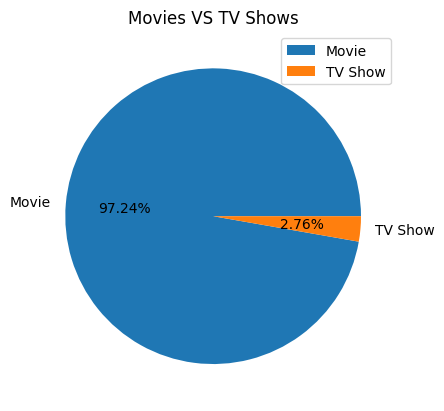

In [34]:
# Visualizing the types of shows
plt.pie(types['count'], labels=types['type'],
        autopct='%.2f%%')
plt.title("Movies VS TV Shows")
plt.legend()
plt.show()

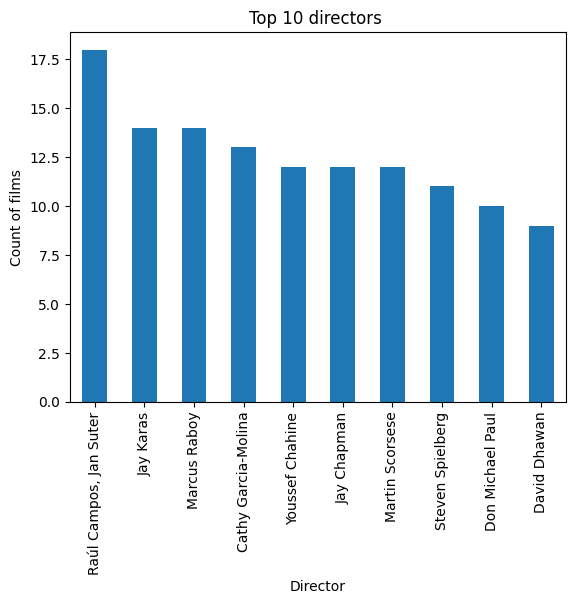

In [35]:
# Visualizing the top 10 directors
top_10_directors.plot(x='director', y='count', kind='bar')
plt.title("Top 10 directors ")
plt.xlabel("Director")
plt.ylabel("Count of films")
plt.legend().remove()
plt.show()

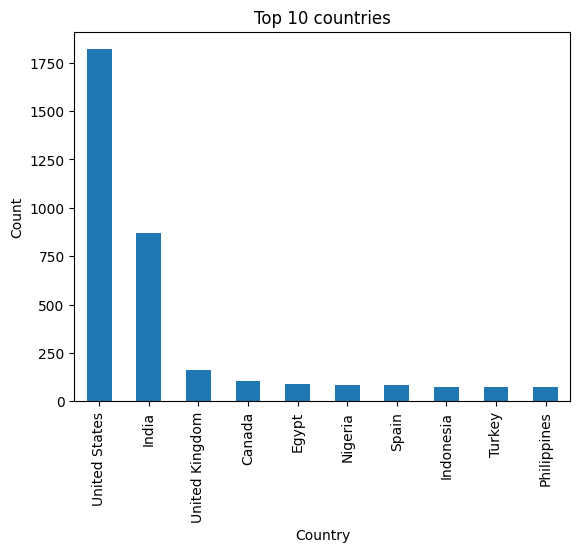

In [36]:
# Visualizing the top 10 countries
top_10_countries.plot(x='country', y='count', kind='bar')
plt.legend().remove()
plt.title("Top 10 countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

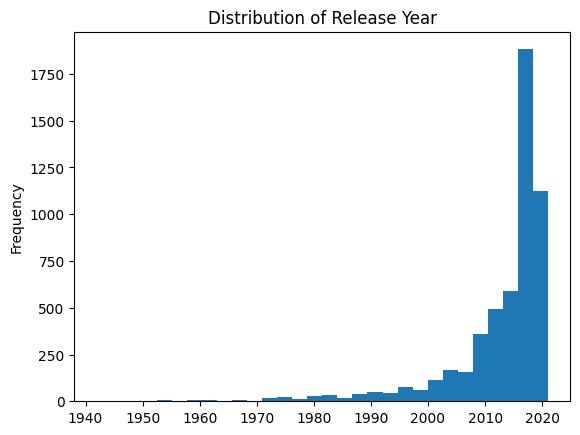

In [37]:
# Visualization release year films
netflix['release_year'].plot(kind='hist', bins=30)
plt.title("Distribution of Release Year")
plt.show()

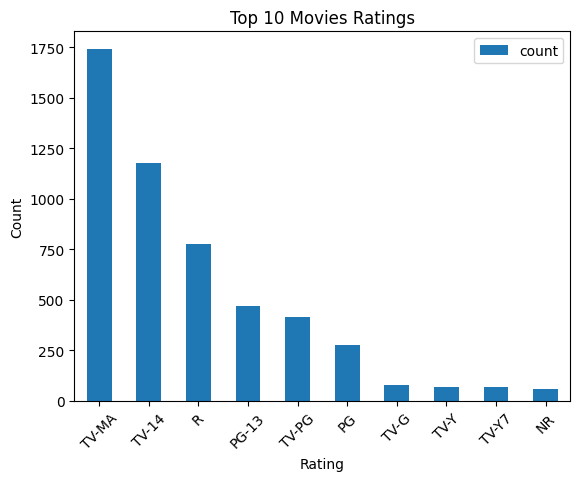

In [38]:
# Visualization top 10 for Movies rating
top_10_movies_rating.plot(x='rating', y='count', kind='bar')
plt.title("Top 10 Movies Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

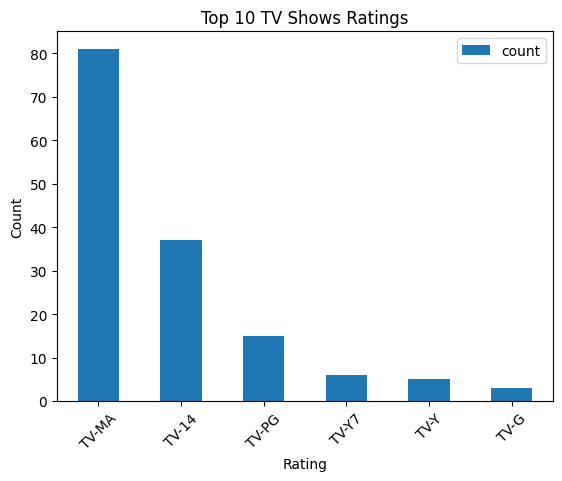

In [39]:
# Visualization top 10 for TV Shows rating
top_10_tv_show_ratings.plot(x='rating', y='count', kind='bar')
plt.title("Top 10 TV Shows Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

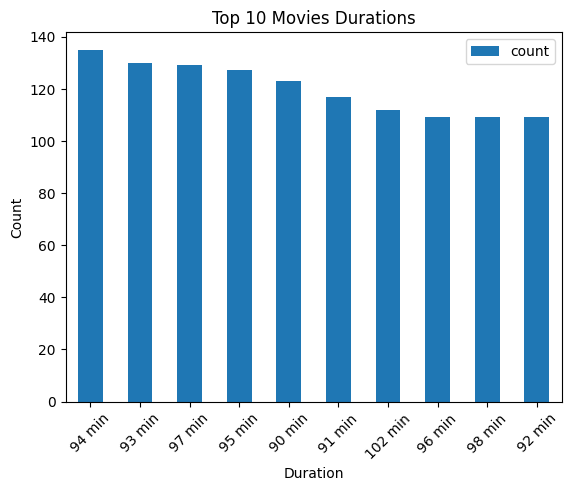

In [43]:
# Visualization top 10 Movies Durations
top_10_movies_durations.plot(x='duration', y='count', kind='bar')
plt.title("Top 10 Movies Durations")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

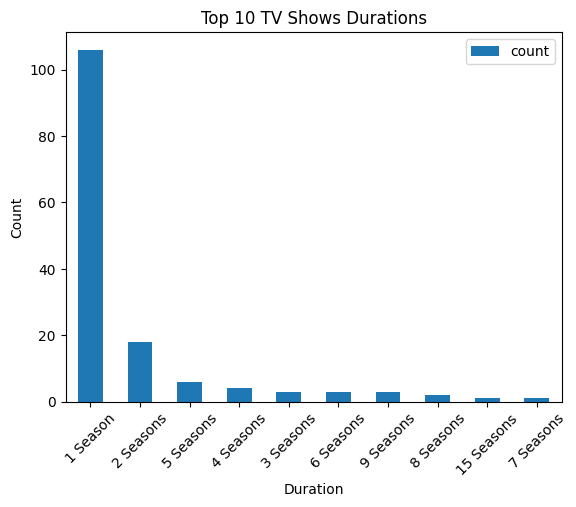

In [44]:
# Visualization top 10 TV Shows Durations
top_10_tv_show_duration.plot(x='duration', y='count', kind='bar')
plt.title("Top 10 TV Shows Durations")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

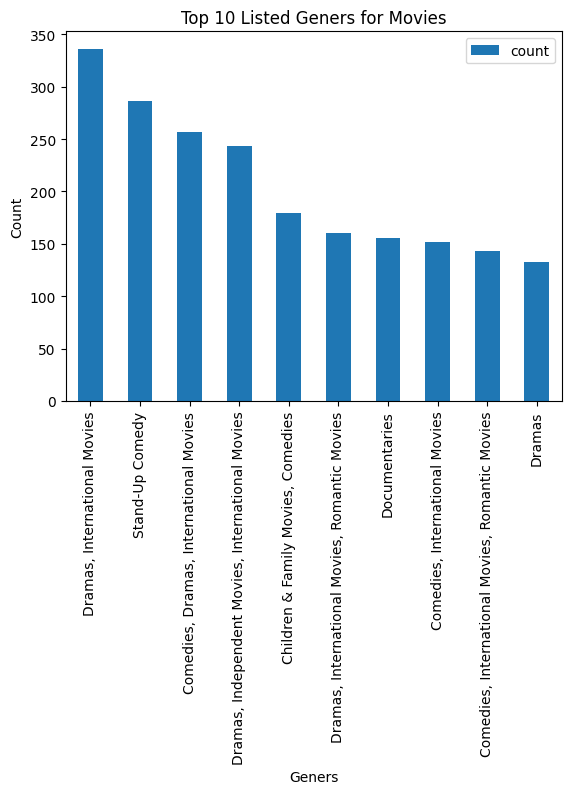

In [46]:
# Visualization top 10 listed geners for Movies
top_10_movies_listed_in.plot(x='listed_in', y='count', kind='bar')
plt.title("Top 10 Listed Geners for Movies")
plt.xlabel("Geners")
plt.ylabel("Count")
plt.show()

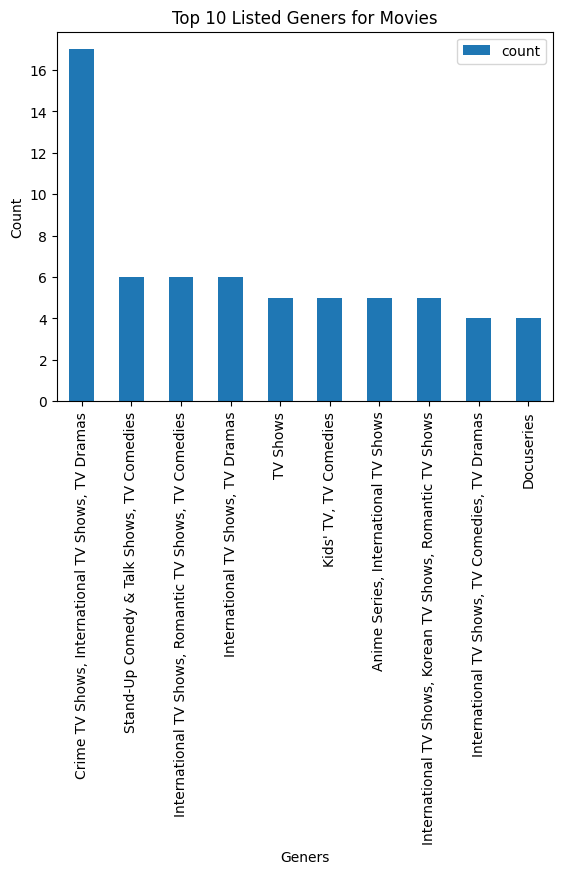

In [47]:
# Visualization top 10 listed geners for TV Shows
top_10_tv_shows_listed_in.plot(x='listed_in', y='count', kind='bar')
plt.title("Top 10 Listed Geners for Movies")
plt.xlabel("Geners")
plt.ylabel("Count")
plt.show()